## Import libraries & datasets

In [14]:
# import pyforest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import LinearSVC, SVC

In [20]:
train_df = pd.read_csv('../Data/train.csv')
val_df = pd.read_csv('../Data/validation.csv')
test_df = pd.read_csv('../Data/test.csv')
dataset_df = pd.read_csv('../Data/BankChurners.csv')

### Original Dataset

In [25]:
dataset = dataset_df.iloc[:,1:-2]
dataset.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [26]:
dataset_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### Training Set

In [3]:
train = train_df.iloc[:,1:]
X_train = train.iloc[:,:-1]
Y_train = train.iloc[:, [-1]]
train.head()

,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,...,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Existing Customer
0,0,0,0,0,0,0,1,0,1,0,...,0.8,0.166667,0.333333,0.123262,0.549464,0.723746,0.571438,0.675667,0.650651,1
1,0,0,0,0,0,0,1,0,0,1,...,0.6,0.333333,0.500000,0.174586,0.000000,0.751884,0.599208,0.700689,0.000000,1
2,0,0,0,0,0,0,0,1,0,0,...,0.4,0.166667,0.333333,0.257095,0.402463,0.788100,0.640195,0.696118,0.311311,1
3,0,0,1,0,0,0,0,0,0,0,...,0.6,0.500000,0.500000,0.058833,0.392133,0.768042,0.620189,0.713148,0.569570,1
4,0,0,1,0,0,0,0,1,0,0,...,0.8,0.333333,0.333333,0.404833,0.655542,0.730922,0.268858,0.604718,0.317317,1


### Validation Set

In [4]:
val = val_df.iloc[:,1:]
X_val = val.iloc[:,:-1]
Y_val = val.iloc[:, [-1]]
val.head()

,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,...,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Existing Customer
0,1,0,0,1,0,0,0,0,0,1,...,1.0,0.166667,0.000000,0.122966,0.524831,0.701375,0.492803,0.731547,0.621622,1
1,0,0,0,0,0,0,0,0,1,0,...,0.6,0.333333,0.333333,0.433408,0.860151,0.749726,0.941269,0.717796,0.380380,1
2,1,0,0,0,0,1,0,0,0,0,...,0.4,0.166667,0.500000,0.466336,0.564164,0.680913,0.538623,0.562644,0.224224,1
3,0,0,0,1,0,0,0,1,0,0,...,0.4,0.500000,0.333333,0.022925,0.000000,0.761274,0.420989,0.487253,0.000000,0
4,0,0,0,0,0,0,0,0,1,0,...,0.6,0.333333,0.666667,0.337953,0.634485,0.736876,0.596527,0.650828,0.379379,1


### Testing Set

In [5]:
# drop first column 
test = test_df.iloc[:,1:]
X_test = test.iloc[:,:-1]
Y_test = test.iloc[:, [-1]]
test.head()

,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,...,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Existing Customer
0,0,0,1,0,0,0,0,1,0,0,...,1.0,0.500000,0.666667,0.735639,0.000000,0.624601,0.303989,0.527017,0.000000,0
1,1,0,1,0,0,0,0,0,1,0,...,1.0,0.333333,0.833333,0.915317,0.542312,0.847168,0.418448,0.731547,0.052052,1
2,0,0,0,0,0,0,1,0,0,1,...,0.0,0.166667,0.333333,0.135159,0.611442,0.760867,0.632296,0.726157,0.696697,1
3,0,0,0,0,0,0,1,0,1,0,...,1.0,0.500000,0.333333,0.709675,0.549861,0.821598,0.557476,0.645912,0.101101,1
4,1,0,0,1,0,0,0,1,0,0,...,0.8,0.500000,0.333333,0.698920,0.683750,0.773612,0.208984,0.790354,0.130130,1


# SVM

In [18]:
# need to explore more on various SVM & hyperparameter tuning (WIP)
svc = SVC(random_state=0)
svc.fit(X_train, np.ravel(Y_train))
Y_pred = svc.predict(X_test)

## Model Evaluation

In [15]:
print('Testing accuracy %s' % accuracy_score(Y_test, Y_pred))

Testing accuracy 0.8336623889437315


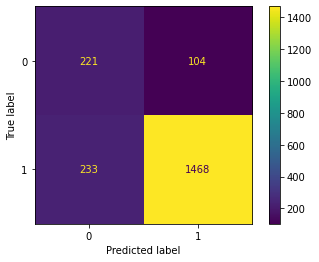

In [16]:
cm = confusion_matrix(Y_test, Y_pred, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = svc.classes_)
disp.plot()

In [17]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
print("AUC:", auc(false_positive_rate, true_positive_rate))
print("Accuracy:", accuracy_score(Y_test, Y_pred.round()))
print("Precision:", precision_score(Y_test, Y_pred.round()))
print("Recall:", recall_score(Y_test, Y_pred.round(), average='macro'))
print("f1_score:", f1_score(Y_test, Y_pred, average='macro'))

AUC: 0.7715108759553203
Accuracy: 0.8336623889437315
Precision: 0.9338422391857506
Recall: 0.7715108759553204
f1_score: 0.7322152265374262


## PCA on Train Set

### Analysis of Explained Variance Ratio w.r.t Number of Components

<IPython.core.display.Javascript object>

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.170024,0.170024
1,0.321786,0.151762
2,0.413516,0.091730
3,0.483291,0.069774
4,0.543956,0.060665
5,0.603275,0.059319
6,0.656104,0.052830
7,0.704795,0.048690
8,0.753346,0.048551
9,0.791170,0.037824


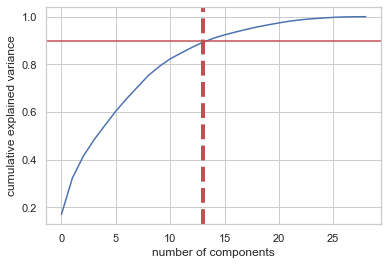

In [49]:
pca_test = PCA(n_components = 29)
pca_test.fit(X_train)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df)

# decision boundary of at least 90% of cumulative explained variance
plt.axhline(color='r', y=0.9)

# ideal number of components -> 13 components 
plt.axvline(color='r', linewidth=4, linestyle='--', x=13)